### Cambriolages en Haute-Garonne 
Ce notebook a pour but de fournir quelques statistiques sur les cambriolages en Haute-Garonne comme leur répartitions selon leurs types, leurs évolutions, leur recensement etc.

Ce notebook utilise les données état4001 présentes sur https://www.data.gouv.fr/fr/datasets/chiffres-departementaux-mensuels-relatifs-aux-crimes-et-delits-enregistres-par-les-services-de-police-et-de-gendarmerie-depuis-janvier-1996/

Ce notebook fait une analyse des cambriolages en Haute-Garonne. 


In [1]:
%matplotlib inline
import pandas as pd
from agd_tools import pg
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.gridspec as gridspec
import seaborn as sns

### Importations des tables

In [2]:
df_index = pg.import_df('index', 'data4001')
df_facts = pg.import_df('facts','data4001')

In [3]:
df_facts['year_month'] = pd.to_datetime(df_facts['year_month'])
df_facts['year'], df_facts['month'] = df_facts['year_month'].dt.year, df_facts['year_month'].dt.month

In [4]:
df_facts.set_index(df_facts['year_month'], inplace=True)

# Analyse des Cambriolages en Haute-Garonne 

Les infractions sont repertoriés selon leurs index. Quatre index définissent les cambriolages.
Ces index sont:
- 27:Cambriolages de locaux d'habitations principales
- 28:Cambriolages des résidences secondaires 
- 29:Cambriolages des locaux industriels, commerciaux ou financiers
- 30:Cambriolages autres lieux

Nous allons réaliser une analyse sur le nombre et types de cambriolages en Haute Garonne tout en se comparant à la France,  puis une analyse sur leurs évolutions au fil du temps.

### Nombres de faits par an

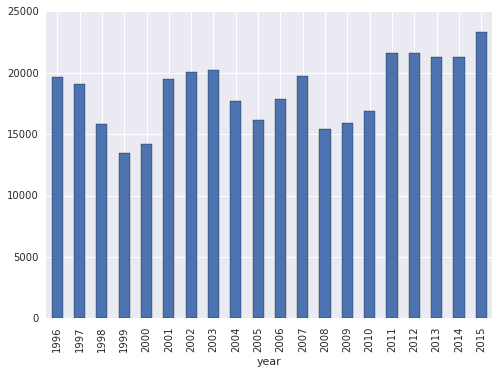

In [5]:
df_facts.loc[ (df_facts['geo'] == "31")  & (df_facts['index'].isin([27,28,29,30]))].groupby(['year']).n.sum().loc[1996:2015].plot(kind="bar")

On remarque une augmentation constante depuis 2008 du nombre de cambriolages en Haute-Garonne, atteignant 23 348 cambriolages en 2015.

### Analyse selon le type de Cambriolages (index)

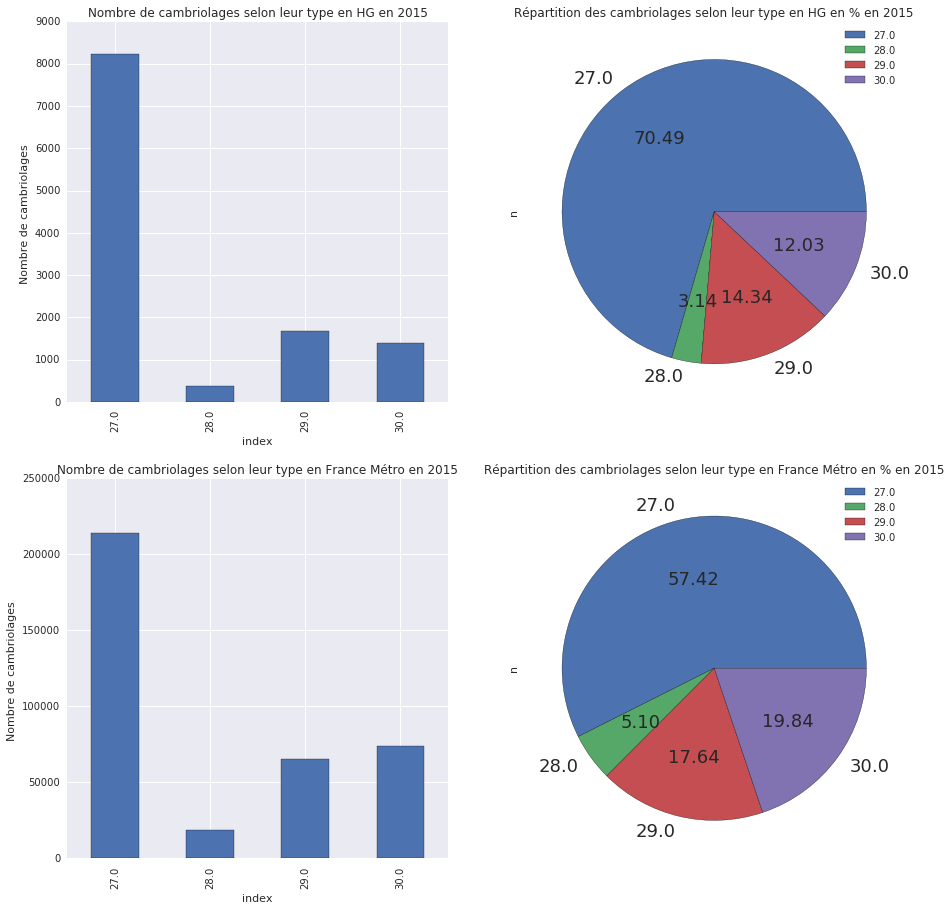

In [7]:

df_cambhg= df_facts.loc[ (df_facts['geo'] == "31") & (df_facts['zone'] == "global") & (df_facts['year'] == 2015) & (df_facts['index'].isin([27,28,29,30]))]

index_hg=df_cambhg.groupby(['index']).n.sum()

df_camb_FM = df_facts.loc[ (df_facts['geo'] == "France_Métro") & (df_facts['zone'] == "global") & (df_facts['year'] == 2015)& (df_facts['index'].isin([27,28,29,30]))]
index_fm=df_camb_FM.groupby(['index']).n.sum()


fig=plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
index_hg.plot(kind="bar")
plt.title("Nombre de cambriolages selon leur type en HG en 2015")
plt.ylabel("Nombre de cambriolages ")

plt.subplot(2,2,2)
index_hg.plot.pie( autopct='%.2f', fontsize=18)
plt.title("Répartition des cambriolages selon leur type en HG en % en 2015")
plt.legend(loc="upper right")

plt.subplot(2,2,3)
index_fm.plot(kind="bar")
plt.title("Nombre de cambriolages selon leur type en France Métro en 2015")
plt.ylabel("Nombre de cambriolages ")

plt.subplot(2,2,4)
index_fm.plot.pie( autopct='%.2f', fontsize=18)
plt.title("Répartition des cambriolages selon leur type en France Métro en % en 2015")
plt.legend(loc="upper right")




Sur l'année 2015 en Haute-Garonne (HG)  il y a : 

- 8 229 (71%) cambriolages de locaux d'habitations principales ;
- 367  (03%) cambriolages de résidences secondaires ;
- 1 674 (14%) cambriolages de locaux industriels, commerciaux ou financiers ;
- 1 404 (12%) cambriolages autres lieux.

Soit un total de 11 674 cambriolages en HG en 2015.

Comparaison avec la France Métropolitaine :

- 213 560 (57%) cambriolages de locaux d'habitations principales ;
- 18 970  (05%) cambriolages de résidences secondaires ;
- 65 611  (18%) cambriolages de locaux industriels, commerciaux ou financiers ;
- 73 784  (20%) cambriolages autres lieux.

Soit un total de 371 925 cambriolages en France Métropolitaine en 2015.


En 2015, Les cambriolages en HG représentent donc 3.13 % des cambriolages en France. On remarque cependant que la HG possède une proportion plus importante de cambriolages de résidences principales.

### Comparaison avec les autres Départements Français sur l'année 2015

['13', '59', '75', '69', '31', '93', '38', '94', '44', '77', '33', '91', '06']

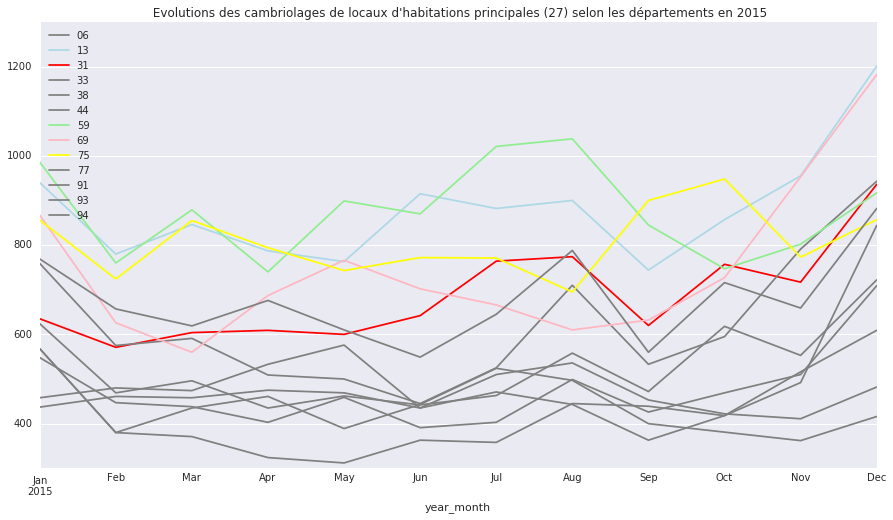

In [9]:
#Classement par rapport aux autres départements
# on filtre avec l'index de cambriolage (27)
df_camb27= df_facts.loc[ (df_facts['zone'] == "global") & (df_facts['year'] == 2015) & (df_facts['index']== 27)]

#on trouve sur les 15 premiers dp qui ont le n total sur les cambriolages : ON RETIRE FRANCE METROP ET  FRANCE ENT
top_geo=df_camb27.groupby(['geo']).n.sum().sort_values(ascending=False).iloc[2:15].index.tolist()

#on trie selon les 15 premiers
df_topgeo = df_camb27.loc[df_camb27['geo'].isin(top_geo)]
df_topgeo.groupby(['year_month','geo']).n.sum().unstack().plot(figsize=(15,8), color=[ 'grey' ,'LightBlue','r','grey','grey','grey','LIghtGreen','LightPink','yellow','grey', 'grey','grey','grey'])
plt.title(" Evolutions des cambriolages de locaux d'habitations principales (27) selon les départements en 2015")
plt.legend(loc='upper left')

total27= df_topgeo.groupby(['year','geo']).n.sum()
top_geo

La Haute-Garonne est le 5ème département qui a le nombre le plus élévé de cambriolages de locaux d'habitations principales avec un total de 8229 cambriolages sur l'année 2015.

['06', '83', '13', '33', '44', '75', '38', '17', '29', '34', '31', '30', '74']

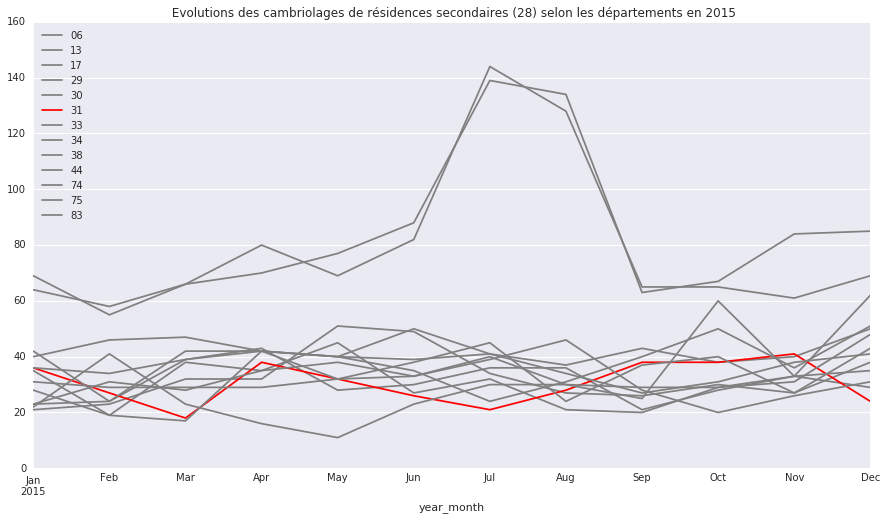

In [8]:
#Classement par rapport aux autres départements
# on filtre avec l'index de cambriolage (28)
df_camb28= df_facts.loc[ (df_facts['zone'] == "global") & (df_facts['year'] == 2015) & (df_facts['index']== 28)]

#on trouve sur les 15 premiers dp qui ont le n total sur les cambriolages : ON RETIRE FRANCE METROP ET  FRANCE ENT
top_geo=df_camb28.groupby(['geo']).n.sum().sort_values(ascending=False).iloc[2:15].index.tolist()

#on trie selon les 15 premiers
df_topgeo = df_camb28.loc[df_camb28['geo'].isin(top_geo)]
df_topgeo.groupby(['year_month','geo']).n.sum().unstack().plot(figsize=(15,8), color=[ 'grey' ,'grey','grey','grey','grey','r','grey','grey','grey','grey', 'grey','grey','grey'])
plt.title(" Evolutions des cambriolages de résidences secondaires (28) selon les départements en 2015")
plt.legend(loc='upper left')

total28= df_topgeo.groupby(['year','geo']).n.sum()
top_geo

La Haute-Garonne est le 11ème département qui a le nombre le plus élévé de cambriolages de résidences secondaires avec un total de 367 cambriolages sur l'année 2015.

['69', '59', '44', '38', '75', '13', '33', '31', '62', '56', '77', '35', '01']

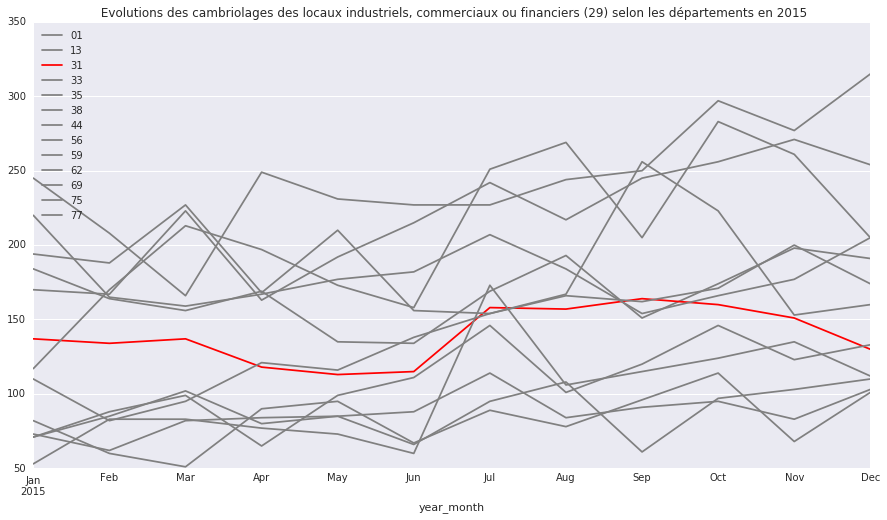

In [10]:
#Classement par rapport aux autres départements
# on filtre avec l'index de cambriolage (29)
df_camb29= df_facts.loc[ (df_facts['zone'] == "global") & (df_facts['year'] == 2015) & (df_facts['index']== 29)]

#on trouve sur les 15 premiers dp qui ont le n total sur les cambriolages : ON RETIRE FRANCE METROP ET  FRANCE ENT
top_geo=df_camb29.groupby(['geo']).n.sum().sort_values(ascending=False).iloc[2:15].index.tolist()

#on trie selon les 15 premiers
df_topgeo = df_camb29.loc[df_camb29['geo'].isin(top_geo)]

df_topgeo.groupby(['year_month','geo']).n.sum().unstack().plot(figsize=(15,8), color=[ 'grey' ,'grey','r','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey'])
plt.title(" Evolutions des cambriolages des locaux industriels, commerciaux ou financiers (29) selon les départements en 2015")
plt.legend(loc='upper left')

total29= df_topgeo.groupby(['year','geo']).n.sum()
top_geo

La Haute Garonne est le 8ème département qui a le nombre le plus élévé de cambriolages de  locaux industriels, commerciaux ou financiers avec un total de 1674 cambriolages sur l'année 2015.

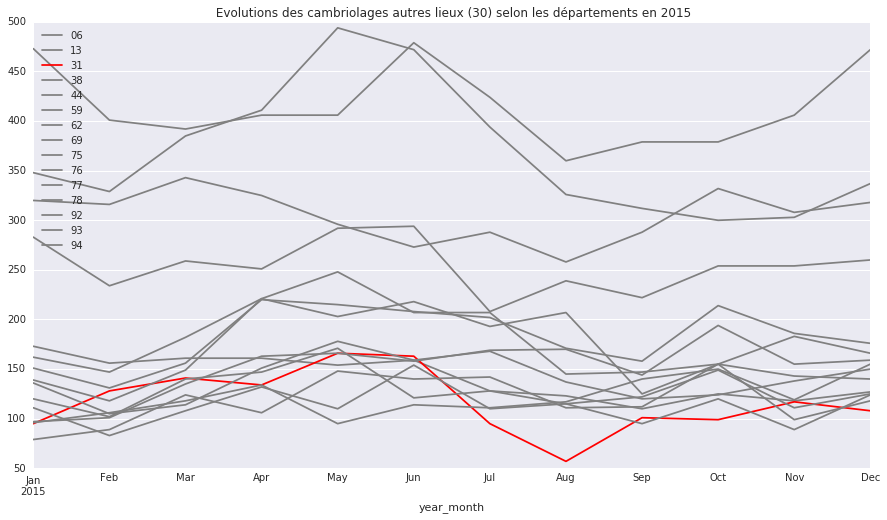

In [11]:
#Classement par rapport aux autres départements
# on filtre avec l'index de cambriolage (29)
df_camb30= df_facts.loc[ (df_facts['zone'] == "global") & (df_facts['year'] == 2015) & (df_facts['index']== 30)]

#on trouve sur les 15 premiers dp qui ont le n total sur les cambriolages : ON RETIRE FRANCE METROP ET  FRANCE ENT
top_geo=df_camb30.groupby(['geo']).n.sum().sort_values(ascending=False).iloc[2:17].index.tolist()

#on trie selon les 15 premiers
df_topgeo = df_camb30.loc[df_camb30['geo'].isin(top_geo)]

df_topgeo.groupby(['year_month','geo']).n.sum().unstack().plot(figsize=(15,8), color=[ 'grey' ,'grey','r','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey'])
plt.title(" Evolutions des cambriolages autres lieux (30) selon les départements en 2015")
plt.legend(loc='upper left')

total30= df_topgeo.groupby(['year','geo']).n.sum()


La Haute-Garonne est le 15ème département qui a le nombre le plus élévé de cambriolages autres lieux avec un total de 1 404 cambriolages sur l'année 2015.

### Analyse de l'évolution des cambriolages 

In [37]:
#Entre 2005 et 2015, en nombre annuel, on a une augmentation :
    #n% des 27 (versus x% France entière et y% France métropolitaine)

In [38]:
def div_2005(serie):
    return serie / (sum_2005)
# Fonction qui prend en parametres un pd.Serie et qui renvoie la serie 

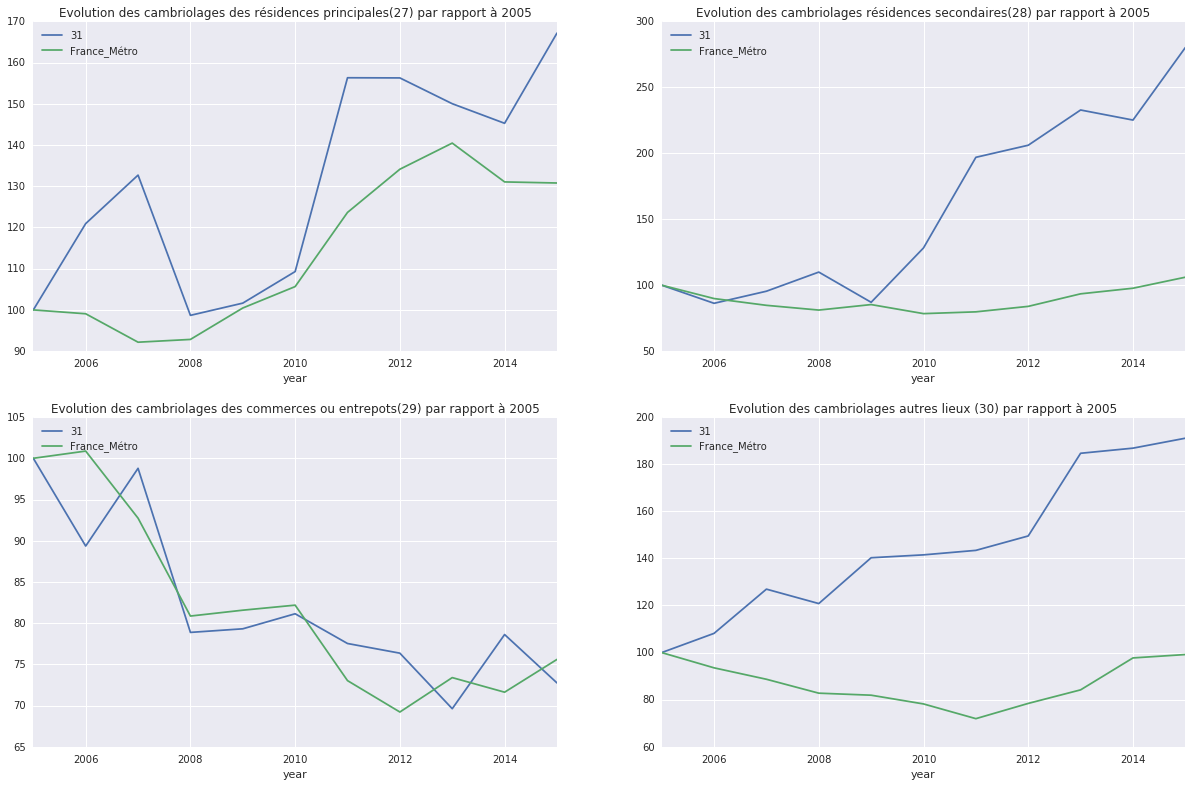

In [39]:
gs = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

#evolution par rapport à une date ini
#on filtre avec l'index de cambriolage (27) entre 2005 et 2015
df_camb27= df_facts.loc[(df_facts['zone'] == "global") & (df_facts['index']==27)]['2005':'2015']
df_camb28= df_facts.loc[(df_facts['zone'] == "global") & (df_facts['index']==28)]['2005':'2015']
df_camb29= df_facts.loc[(df_facts['zone'] == "global") & (df_facts['index']==29)]['2005':'2015']
df_camb30= df_facts.loc[(df_facts['zone'] == "global") & (df_facts['index']==30)]['2005':'2015']

""" DF 27 """
#on trie selon HG FE FM
df_topgeo = df_camb27.loc[df_camb27['geo'].isin(["31", "France_Métro"])]
sum_2005 = df_topgeo['2005'].groupby(['geo','year']).n.sum().unstack()[2005]
tab27=df_topgeo['2005':].groupby(['geo','year']).n.sum().unstack(level=0)
result=tab27.apply(div_2005 , axis=1)*100
result.plot(figsize=(16,13), ax=ax1,
            title = "Evolution des cambriolages des résidences principales(27) par rapport à 2005")
ax1.legend(loc='upper left')

""" DF 28 """
df_topgeo = df_camb28.loc[df_camb28['geo'].isin(["31", "France_Métro"])]
sum_2005 = df_topgeo['2005'].groupby(['geo','year']).n.sum().unstack()[2005]
tab28=df_topgeo['2005':].groupby(['geo','year']).n.sum().unstack(level=0)
result=tab28.apply(div_2005 , axis=1)*100
result.plot(figsize=(16,13), ax=ax2,
            title = "Evolution des cambriolages résidences secondaires(28) par rapport à 2005")
ax2.legend(loc='upper left')

""" DF 29 """
#on trie selon HG FE FM
df_topgeo = df_camb29.loc[df_camb29['geo'].isin(["31", "France_Métro"])]
sum_2005 = df_topgeo['2005'].groupby(['geo','year']).n.sum().unstack()[2005]
tab29=df_topgeo['2005':].groupby(['geo','year']).n.sum().unstack(level=0)
result=tab29.apply(div_2005 , axis=1)*100
result.plot(figsize=(16,13), ax=ax3,
            title = "Evolution des cambriolages des commerces ou entrepots(29) par rapport à 2005")
ax3.legend(loc='upper left')

""" DF 30 """
#on trie selon HG FE FM
df_topgeo = df_camb30.loc[df_camb30['geo'].isin(["31", "France_Métro"])]
sum_2005 = df_topgeo['2005'].groupby(['geo','year']).n.sum().unstack()[2005]
tab30=df_topgeo['2005':].groupby(['geo','year']).n.sum().unstack(level=0)
result=tab30.apply(div_2005 , axis=1)*100
result.plot(figsize=(16,13), ax=ax4,
            title = "Evolution des cambriolages autres lieux (30) par rapport à 2005")
ax4.legend(loc='upper left')

gs.update(left=2, right=3)


Depuis 2005, on observe :
- une augmentation des 27 de 67% en HG versus 31%  en France métropolitaine (FM);
- une augmentation des 28 de 180% en HG versus 6% en FM ;
- une diminution   des 29 de 28% en HG versus 25% en FM;
- une augmentation des 30 de 91% en HG contre une diminution de 1% en FM.

### Analyse selon la zone (Police/Gendarmerie)

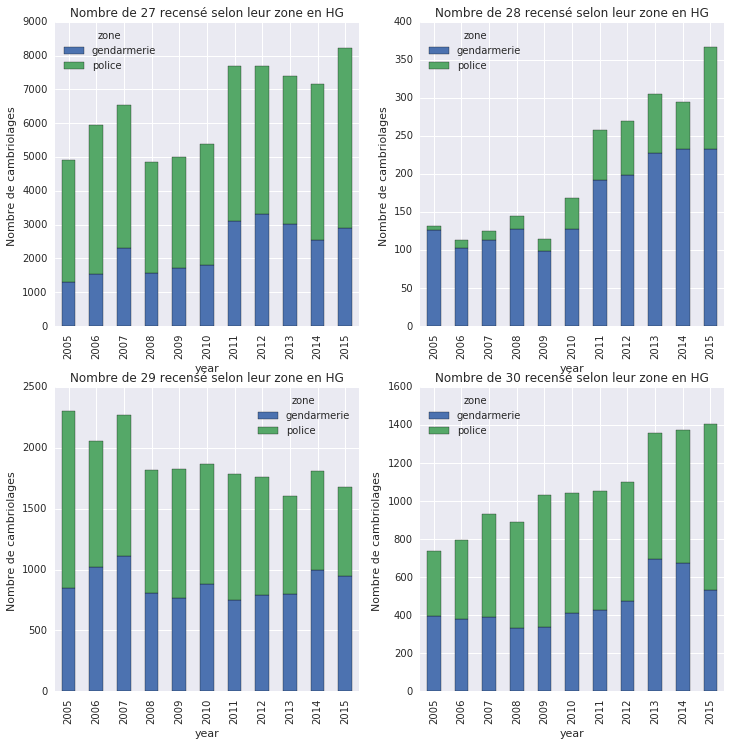

In [40]:
#recensés par la police

df_27= df_facts.loc[ (df_facts['index'] == 27)  & (df_facts["geo"] == "31")]
df_police_gend27= df_27.loc[df_27['zone'].isin(['gendarmerie','police'])].groupby(['year','zone']).n.sum().loc[2005:2015].unstack()

df_28= df_facts.loc[ (df_facts['index'] == 28)  & (df_facts["geo"] == "31")]
df_police_gend28= df_28.loc[df_28['zone'].isin(['gendarmerie','police'])].groupby(['year','zone']).n.sum().loc[2005:2015].unstack()

df_29 = df_facts.loc[ (df_facts['index'] == 29)  & (df_facts["geo"] == "31")]
df_police_gend29 = df_29.loc[df_29['zone'].isin(
        ['gendarmerie','police'])].groupby(['year','zone']).n.sum().loc[2005:2015].unstack()

df_30=df_facts.loc[ (df_facts['index'] == 30)  & (df_facts["geo"] == "31")]
df_police_gend30= df_30.loc[df_30['zone'].isin(
        ['gendarmerie','police'])].groupby(['year','zone']).n.sum().loc[2005:2015].unstack()

gs = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

df_police_gend27.plot(kind="bar", stacked=True, ax=ax1, title="Nombre de 27 recensé selon leur zone en HG", figsize=(12,12))
ax1.set_ylabel("Nombre de cambriolages ")

df_police_gend28.plot(kind="bar", stacked=True, ax=ax2,  title="Nombre de 28 recensé selon leur zone en HG")
ax2.set_ylabel("Nombre de cambriolages ")

df_police_gend29.plot(kind="bar", stacked=True, ax=ax3,  title="Nombre de 29 recensé selon leur zone en HG")
ax3.set_ylabel("Nombre de cambriolages ")

df_police_gend30.plot(kind="bar", stacked=True, ax=ax4,  title="Nombre de 30 recensé selon leur zone en HG")
plt.ylabel("Nombre de cambriolages ")


La plupart des cambriolages des résidences principales (27) sont recensés par la police et ceux des résidences secondaires (28) par la gendarmerie. Ces deux index suivent le ratio 65-35 concernant leur type de rencensement en 2015.